In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
car_dataset = pd.read_csv('car data.csv')
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [49]:
car_dataset.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [6]:
car_dataset.shape

(301, 9)

In [7]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
car_dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [3]:
car_dataset.duplicated().sum()

2

In [4]:
car_dataset.drop_duplicates()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [5]:
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


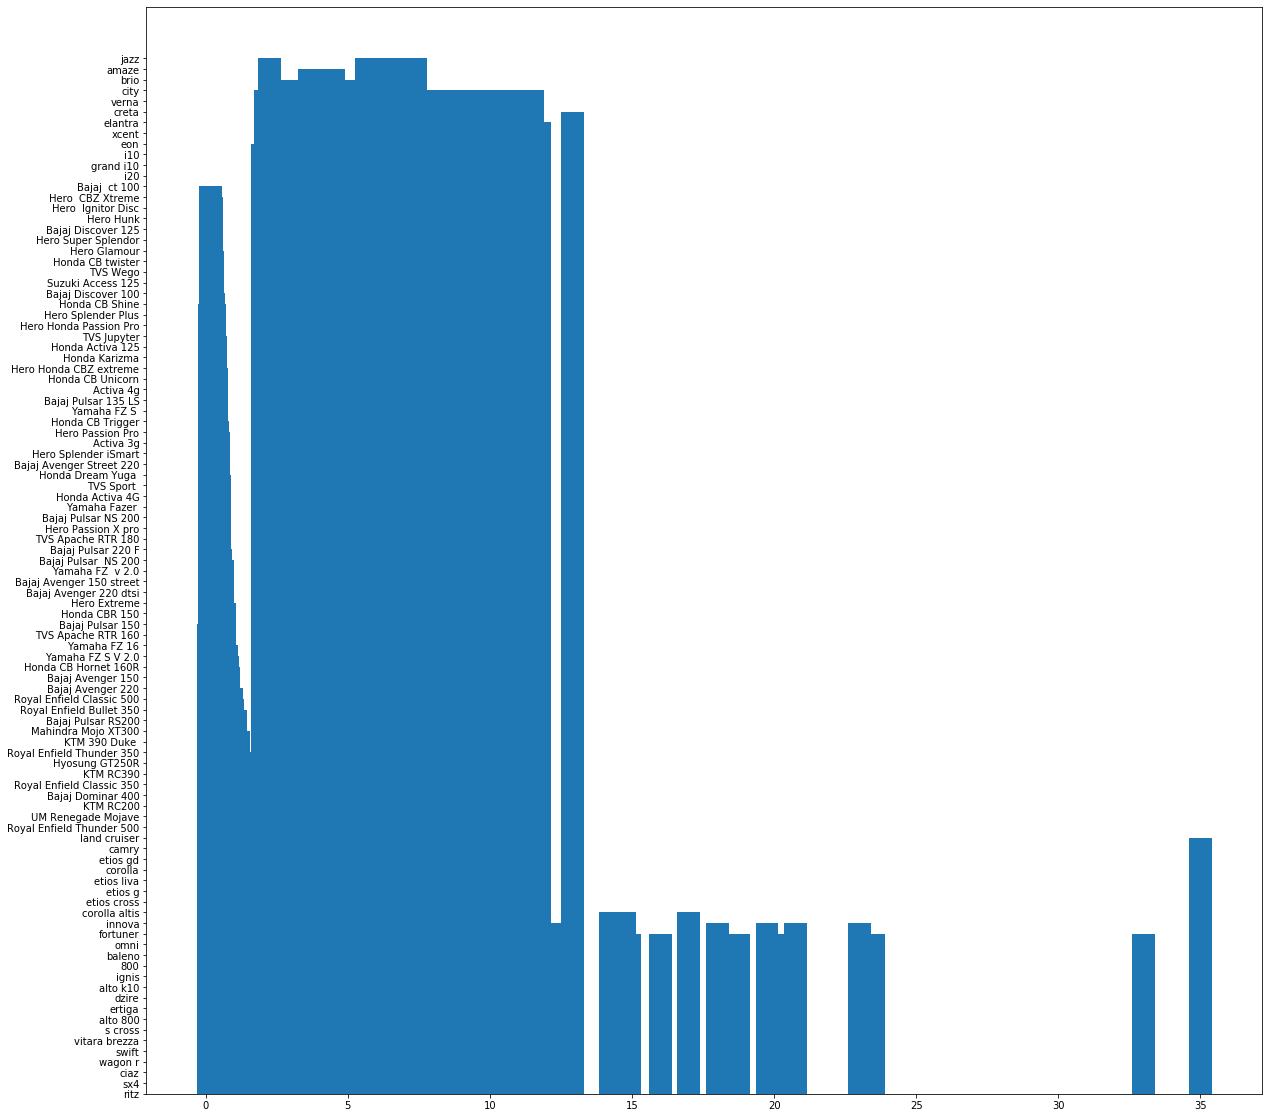

In [55]:
plt.figure(figsize=(20,20))
plt.bar("Selling_Price","Car_Name",data=car_dataset)
plt.show()

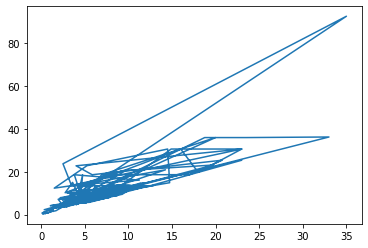

In [57]:
plt.plot("Selling_Price","Present_Price",data=car_dataset)
plt.show()

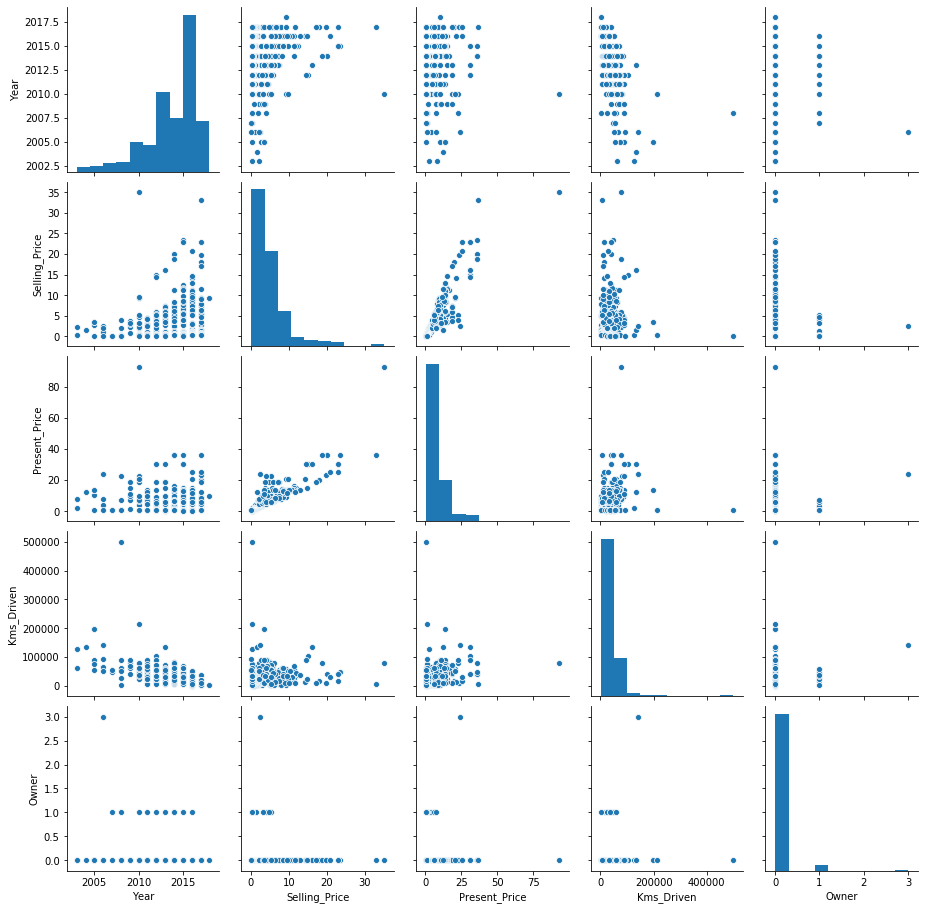

In [58]:
sns.pairplot(car_dataset)

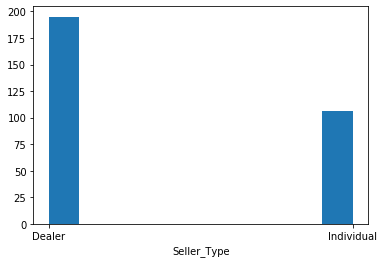

In [60]:
plt.hist(car_dataset["Seller_Type"])
plt.xlabel("Seller_Type")
plt.show()

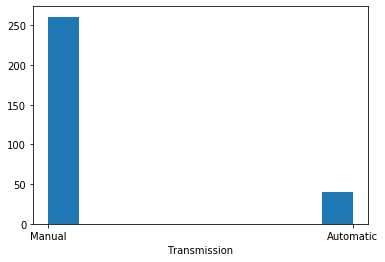

In [61]:
plt.hist(car_dataset["Transmission"])
plt.xlabel("Transmission")
plt.show()

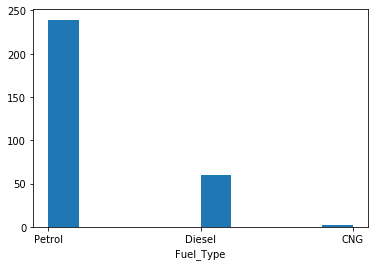

In [62]:
plt.hist(car_dataset["Fuel_Type"])
plt.xlabel("Fuel_Type")
plt.show()

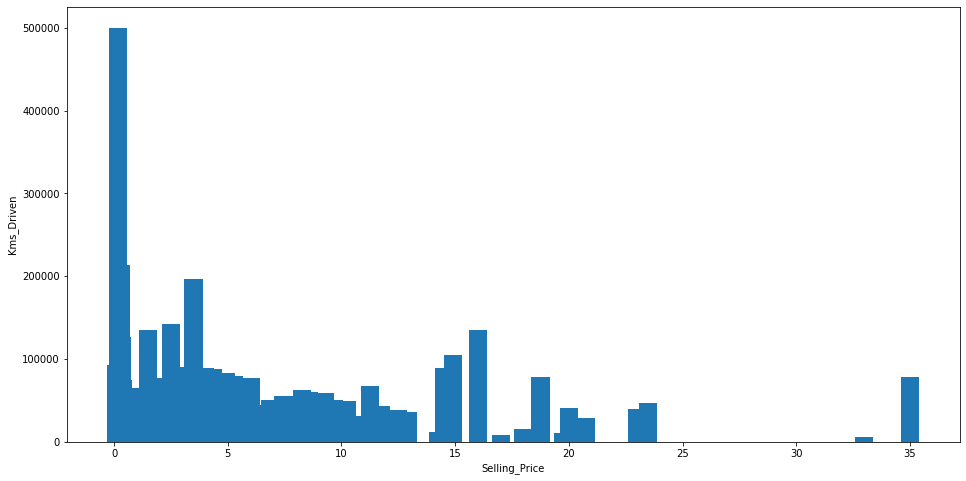

In [64]:
plt.figure(figsize=(16,8))
plt.bar("Selling_Price","Kms_Driven",data=car_dataset)
plt.xlabel("Selling_Price")
plt.ylabel("Kms_Driven")
plt.show()

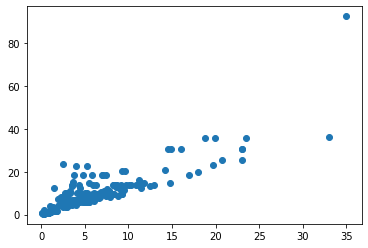

In [67]:
plt.scatter(car_dataset["Selling_Price"],car_dataset["Present_Price"])
plt.show()

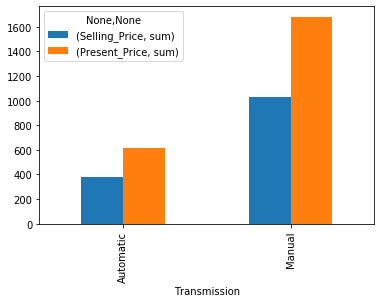

In [69]:
car_dataset.groupby("Transmission")[["Selling_Price","Present_Price"]].agg(["sum"]).plot.bar()

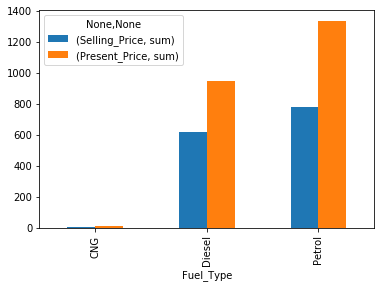

In [70]:
car_dataset.groupby("Fuel_Type")[["Selling_Price","Present_Price"]].agg(["sum"]).plot.bar()

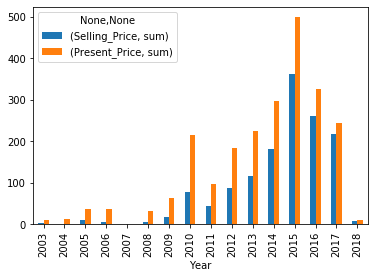

In [71]:
car_dataset.groupby("Year")[["Selling_Price","Present_Price"]].agg(["sum"]).plot.bar()

In [6]:
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [7]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [8]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=2)

In [10]:
model = LinearRegression()

In [11]:
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
y_pred=model.predict(X_train)
y_pred

array([ 3.49096195e+00,  2.30578095e+00,  7.59214485e+00,  4.62702213e+00,
        4.45913411e+00,  4.54013114e+00,  2.77144261e+00,  4.46791692e+00,
        1.69386304e+00,  2.34555281e-01,  3.97865454e+00,  1.41554166e+00,
        4.62646285e+00,  1.36535831e+00,  7.42323913e+00,  7.22963231e+00,
        6.63438323e+00,  2.26719024e+00,  2.19170567e+01,  2.22580722e+00,
        5.65883684e+00,  2.85033590e+00,  7.86131616e+00,  5.57382214e+00,
        1.00870075e+01,  1.97864140e+00,  2.40940371e+00,  1.21398749e+00,
        2.37795431e+00,  1.00008576e+01,  2.05440453e+00, -6.75202226e-01,
        5.53447628e+00,  1.13512170e+01, -2.23630350e-02,  1.07731770e+00,
        1.66063080e+00,  5.39921779e+00,  1.35038086e+00,  7.80330432e+00,
        1.84900226e+01,  2.47152726e+00,  1.41977554e-01,  1.79747547e+00,
        9.38551926e+00,  3.97130205e+00,  7.02830917e+00,  1.69890641e+01,
        1.03663851e+01,  3.67606850e+00,  1.41289759e+00,  4.32471389e+00,
       -4.64906780e-01,  

In [13]:
error_score = metrics.r2_score(Y_train, y_pred)
print("R squared Error : ", error_score)

R squared Error :  0.884517503389412


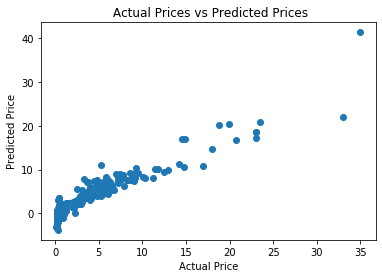

In [14]:
plt.scatter(Y_train, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()


In [15]:
test_data_prediction = model.predict(X_test)
test_data_prediction

array([ 1.04165866e+01,  6.95979427e-01,  4.28629157e+00,  4.99849227e+00,
        9.90256692e+00,  4.24879177e+00,  7.28495515e+00,  7.45812233e+00,
        1.44967493e-01,  5.18245630e+00,  6.20822090e+00,  6.26994729e+00,
        2.18614249e+00,  7.72319939e+00,  1.96143510e+00,  1.69312936e+00,
        2.00894064e+00,  1.83592362e+00,  9.41254756e+00,  4.28193312e+00,
        1.46293990e+00,  9.20370869e+00,  1.44115525e+00,  9.69949218e+00,
        8.03114723e-01,  8.15524372e+00,  1.51950627e+00, -3.22579930e+00,
        4.25516491e+00,  2.13062853e+00,  3.49263981e+00,  3.75792892e+00,
        5.59441578e+00,  7.74120839e+00, -1.92563119e+00,  6.89312552e+00,
        8.28539253e+00,  5.82637511e+00,  6.15916037e+00,  6.36111315e+00,
        1.60094601e+01,  2.05368349e+00,  1.03218570e+00, -4.73666023e-01,
        6.90964246e+00,  6.78931425e+00,  9.72076334e-01,  6.91549694e+00,
        1.43294102e+01,  3.05222940e+00,  8.12168659e+00, -9.08898605e-01,
        8.94978735e+00,  

In [16]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8340915574384826


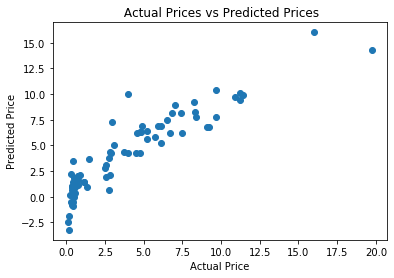

In [29]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [30]:
model2 = Lasso()

In [31]:
model2.fit(X_train,Y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [33]:
training_data_prediction = model2.predict(X_train)
training_data_prediction

array([ 2.45739721e+00,  2.94442374e+00,  6.09051782e+00,  5.03030480e+00,
        4.43273857e+00,  3.71489911e+00,  2.73319089e+00,  4.42927714e+00,
        2.38214401e+00,  1.07073131e+00,  3.73038239e+00,  1.52521392e+00,
        5.02972844e+00,  2.12068875e+00,  6.18852148e+00,  7.82973412e+00,
        5.37791962e+00,  2.90465486e+00,  2.05261539e+01,  2.63686822e+00,
        5.70898037e+00,  3.22590736e+00,  3.89808367e+00,  9.57950540e+00,
        8.49866974e+00,  2.56600573e+00,  2.54178364e+00,  1.83006086e+00,
        3.02693361e+00,  8.55140718e+00,  2.15154716e+00,  1.01968672e+00,
        4.08114580e+00,  1.23890800e+01,  8.68658750e-01,  1.76629727e+00,
        1.55355881e+00,  5.52789816e+00,  1.97499766e+00,  6.47091258e+00,
        1.67882930e+01,  3.13712697e+00,  9.49676785e-01,  2.48016106e+00,
        7.53602524e+00,  4.74004773e+00,  7.16955914e+00,  1.54596083e+01,
        9.79283987e+00,  3.75865234e+00,  2.16967940e+00,  4.26918973e+00,
        3.92584300e-01,  

In [34]:
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8427955651055719


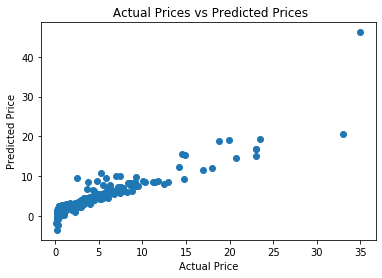

In [35]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [38]:
test_data_prediction = model2.predict(X_test)
test_data_prediction

array([ 9.844574  ,  1.4632832 ,  4.36860941,  3.21039503,  8.93769114,
        4.30744245,  3.76071303,  5.69155741,  0.9458762 ,  5.27886854,
        6.47921661,  4.43595391,  1.33146535,  8.26567043,  2.04510384,
        2.35323506,  2.60098373,  2.40078781,  8.01783539,  4.23135905,
        2.3521315 ,  7.90034482,  2.06791778,  8.58126842,  1.57706769,
        6.52069657,  2.16492697, -1.16632765,  4.04536437,  2.20194542,
        2.45912629,  3.60564713,  5.62382396,  8.28422924, -0.80460886,
        5.30413393,  6.52080874,  5.76076151,  6.42865826,  4.82857859,
       15.5432384 ,  2.64709258,  1.71916176,  0.49004048,  5.21905163,
        6.89511482,  1.6684784 ,  5.32718836, 13.87730515,  2.92294909,
        6.48611494,  0.10796343,  9.98854025,  1.83782053,  2.69738019,
        0.09756904,  1.42274669, 10.10167591,  0.47401026, -1.27542223,
        8.98555584,  6.89430792,  2.82880173,  4.03378175,  0.90641068,
        3.16182186,  2.66798634,  2.1725612 ,  1.25194308,  2.23

In [42]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_test,test_data_prediction)
print("Accuracy : {:.2f}%".format(accuracy*100))

ValueError: continuous is not supported

In [39]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8488713419782646


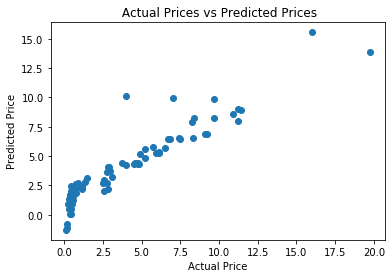

In [40]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()